In [1]:
import os
import numpy as np

In [2]:
# Directory with Jeans pictures
jeans_dir = os.path.join('Clothes/Train/Jeans_Images')

# Directory with Saree pictures
saree_dir = os.path.join('Clothes/Train/Sarees_Images')

# Directory with Trouser pictures
trousers_dir = os.path.join('Clothes/Train/Trousers_Images')

In [3]:
train_jeans_names = os.listdir(jeans_dir)
print(train_jeans_names[:5])

train_saree_names = os.listdir(saree_dir)
print(train_saree_names[:5])

train_trousers_names = os.listdir(trousers_dir)
print(train_trousers_names[:5])

['img1.jpeg', 'img10.jpeg', 'img100.jpeg', 'img101.jpeg', 'img102.jpeg']
['img1.jpeg', 'img10.jpeg', 'img100.jpeg', 'img101.jpeg', 'img102.jpeg']
['img1.jpeg', 'img10.jpeg', 'img100.jpeg', 'img101.jpeg', 'img102.jpeg']


In [4]:
print('total jeans images:', len(os.listdir(jeans_dir)))
print('total saree images:', len(os.listdir(saree_dir)))
print('total trousers images:', len(os.listdir(trousers_dir)))

total jeans images: 300
total saree images: 300
total trousers images: 300


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Showing some jeans pictures...



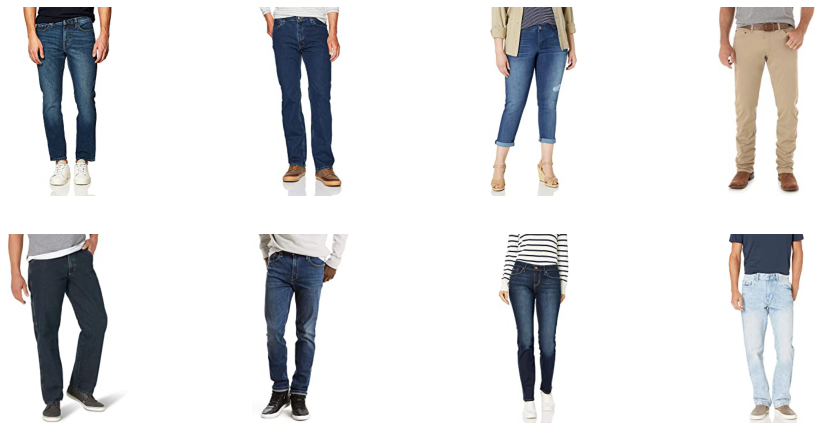

Showing some Sarees pictures...



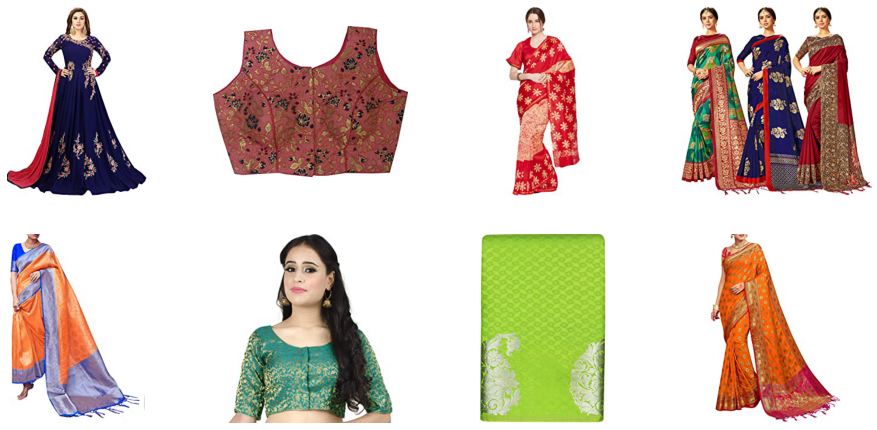

Showing some trousers pictures...



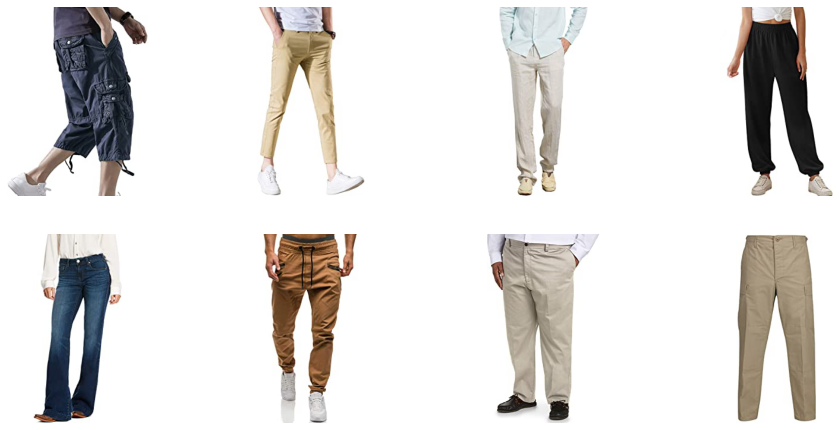

In [6]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_jeans_pix = [os.path.join(jeans_dir, fname) 
                for fname in train_jeans_names[pic_index-8:pic_index]]
next_saree_pix = [os.path.join(saree_dir, fname) 
                for fname in train_saree_names[pic_index-8:pic_index]]
next_trousers_pix = [os.path.join(trousers_dir, fname) 
                for fname in train_trousers_names[pic_index-8:pic_index]]

print ("Showing some jeans pictures...")
print()
for i, img_path in enumerate(next_jeans_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

print ("Showing some Sarees pictures...")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_saree_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

print ("Showing some trousers pictures...")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_trousers_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [7]:
print("Count of Training Images")
print("No.of Images of Sarees in train dataset :",len(os.listdir('Clothes/Train/Sarees_Images')))
print("No.of Images of Jeans in train dataset :",len(os.listdir('Clothes/Train/Jeans_Images')))
print("No.of Images of Trousers in train dataset :",len(os.listdir('Clothes/Train/Trousers_Images')))
print()
print("Count of Test Images")
print("No.of Images of Sarees in test dataset :",len(os.listdir('Clothes/Test/Sarees_Images')))
print("No.of Images of Jeans in test dataset :",len(os.listdir('Clothes/Test/Jeans_Images')))
print("No.of Images of Trousers in test dataset :",len(os.listdir('Clothes/Test/Trousers_Images')))

Count of Training Images
No.of Images of Sarees in train dataset : 300
No.of Images of Jeans in train dataset : 300
No.of Images of Trousers in train dataset : 300

Count of Test Images
No.of Images of Sarees in test dataset : 43
No.of Images of Jeans in test dataset : 43
No.of Images of Trousers in test dataset : 43


In [8]:
train_data='Clothes/Train'
test_data='Clothes/Test'

In [9]:
input_shape=(200,320,3)
batch_size=12

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Data Augmentation on Training Images

Train_datagen=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
Training_set=Train_datagen.flow_from_directory(train_data,
                                                              target_size=(200,320),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')


Found 900 images belonging to 3 classes.


In [12]:
# Test Data Generator
Test_datagen=ImageDataGenerator(rescale=1./255)
Test_set=Test_datagen.flow_from_directory(test_data,
                                                  target_size=(200,320),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 129 images belonging to 3 classes.


In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 320 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 320, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 3 output neurons for 3 classes with the softmax activation
    tf.keras.layers.Dense(3, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 318, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 159, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 157, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 78, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 76, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 36, 64)        3

In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [17]:
total_sample = Training_set.n

In [18]:
n_epochs = 100

In [19]:
history = model.fit(
        Training_set, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/100
75/75 [==============================] - 81s 1s/step - loss: 1.0964 - acc: 0.4449
Epoch 2/100
75/75 [==============================] - 70s 924ms/step - loss: 0.7091 - acc: 0.6565
Epoch 3/100
75/75 [==============================] - 74s 984ms/step - loss: 0.5541 - acc: 0.7916
Epoch 4/100
75/75 [==============================] - 69s 915ms/step - loss: 0.5365 - acc: 0.7674
Epoch 5/100
75/75 [==============================] - 69s 919ms/step - loss: 0.5040 - acc: 0.8008
Epoch 6/100
75/75 [==============================] - 69s 917ms/step - loss: 0.4706 - acc: 0.8065
Epoch 7/100
75/75 [==============================] - 71s 940ms/step - loss: 0.3977 - acc: 0.8448
Epoch 8/100
75/75 [==============================] - 69s 913ms/step - loss: 0.4285 - acc: 0.8135
Epoch 9/100
75/75 [==============================] - 69s 916ms/step - loss: 0.4094 - acc: 0.8503
Epoch 10/100
75/75 [==============================] - 69s 922ms/step - loss: 0.3892 - acc: 0.8363
Epoch 11/100
75/75 [============

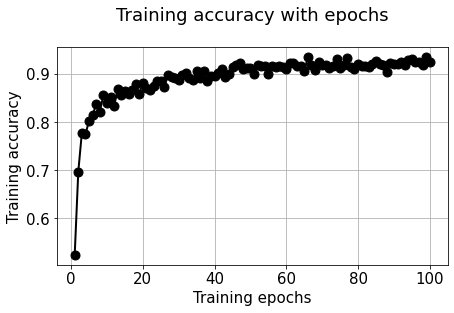

In [20]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

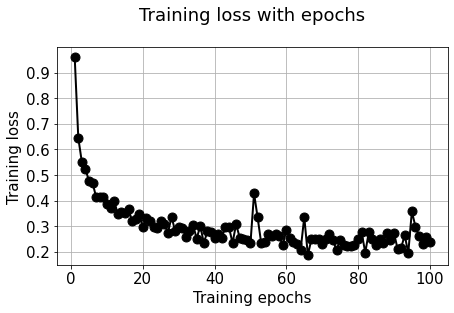

In [21]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [22]:
from PIL import Image

In [23]:
test_jeans = os.listdir('Clothes/Test/Jeans_Images/')[:5]
print(test_jeans)
test_sarees = os.listdir('Clothes/Test/Sarees_Images/')[:5]
print(test_sarees)
test_trousers = os.listdir('Clothes/Test/Trousers_Images/')[:5]
print(test_trousers)

['img301.jpeg', 'img302.jpeg', 'img303.jpeg', 'img304.jpeg', 'img305.jpeg']
['img301.jpeg', 'img302.jpeg', 'img303.jpeg', 'img304.jpeg', 'img305.jpeg']
['img301.jpeg', 'img302.jpeg', 'img303.jpeg', 'img304.jpeg', 'img305.jpeg']


In [24]:
Categories = ["Jeans", "Sarees", "Trousers"]

In [25]:
set(Test_set.classes)  # Unique Values of the Classes to be predicted

{0, 1, 2}

In [26]:
# Defining Function to plot the test image and predict class using the model trained
def ploting_predict(path,img_name):
    img_test=Image.open(path + img_name)
    plt.imshow(img_test)
    plt.show()  # Plotting the input Test Image
    img_test = img_test.resize((200,320))    
    img_test=np.expand_dims(img_test,axis=0) # Expand dimensions for proper prediction
    print("Predicted as: ",Categories[int(np.argmax(model.predict(img_test)))])  # Predicting Classes using the Model
    print()  

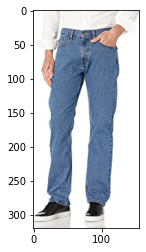

Predicted as:  Trousers



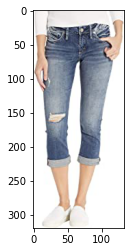

Predicted as:  Jeans



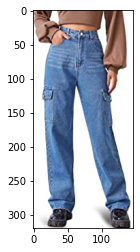

Predicted as:  Trousers



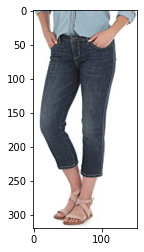

Predicted as:  Jeans



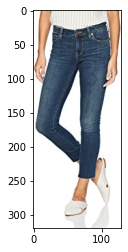

Predicted as:  Jeans



In [30]:
path = 'Clothes/Test/Jeans_Images/'
for i in test_jeans:
    ploting_predict(path,i)

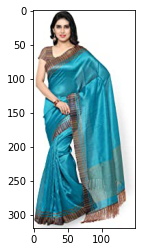

Predicted as:  Sarees



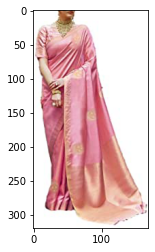

Predicted as:  Sarees



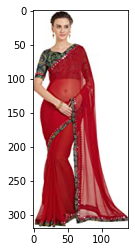

Predicted as:  Sarees



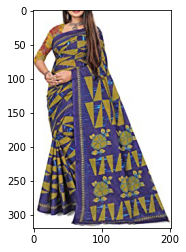

Predicted as:  Sarees



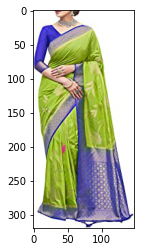

Predicted as:  Sarees



In [31]:
path = 'Clothes/Test/Sarees_Images/'
for i in test_sarees:
    ploting_predict(path,i)

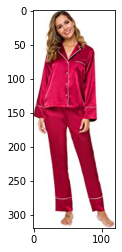

Predicted as:  Jeans



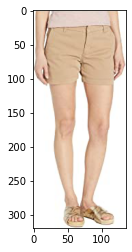

Predicted as:  Sarees



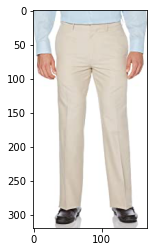

Predicted as:  Sarees



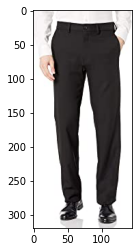

Predicted as:  Trousers



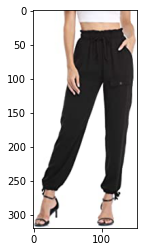

Predicted as:  Trousers



In [32]:
path = 'Clothes/Test/Trousers_Images/'
for i in test_trousers:
    ploting_predict(path,i)

### Conclusion 

The Deep Learning model used performed well while detecting sarees but had difficulties in distinguishing between jeans and trousers